<a href="https://colab.research.google.com/github/khalida-mujahid/ML-practice/blob/master/Gender_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pwd

/content


In [0]:
!wget https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/wiki_crop.tar -O data.tar

--2019-03-16 13:12:44--  https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/wiki_crop.tar
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.162
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.162|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 811315200 (774M) [application/x-tar]
Saving to: ‘data.tar’

data.tar            100%[===================>] 773.73M  2.96MB/s    in 4m 2s   

2019-03-16 13:16:46 (3.20 MB/s) - ‘data.tar’ saved [811315200/811315200]



In [0]:
import tarfile

f = tarfile.TarFile('/content/data.tar')
f.extractall('Data')

In [0]:
!ls Data/wiki_crop/

00  06	12  18	24  30	36  42	48  54	60  66	72  78	84  90	96
01  07	13  19	25  31	37  43	49  55	61  67	73  79	85  91	97
02  08	14  20	26  32	38  44	50  56	62  68	74  80	86  92	98
03  09	15  21	27  33	39  45	51  57	63  69	75  81	87  93	99
04  10	16  22	28  34	40  46	52  58	64  70	76  82	88  94	wiki.mat
05  11	17  23	29  35	41  47	53  59	65  71	77  83	89  95


In [0]:
from scipy.io import loadmat

In [0]:
Data = loadmat('/content/Data/wiki_crop/wiki.mat')
paths = Data['wiki']['full_path'][0][0][0][:]
labels = Data['wiki']['gender'][0][0][0][:]

In [0]:
import pandas as pd

Data = pd.DataFrame({"Paths": paths, "Labels": labels})
Data['Paths'] = Data.Paths.map(lambda x: x[0])
Data.head()

,Labels,Paths
0,1.0,17/10000217_1981-05-05_2009.jpg
1,1.0,48/10000548_1925-04-04_1964.jpg
2,1.0,12/100012_1948-07-03_2008.jpg
3,1.0,65/10001965_1930-05-23_1961.jpg
4,0.0,16/10002116_1971-05-31_2012.jpg


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


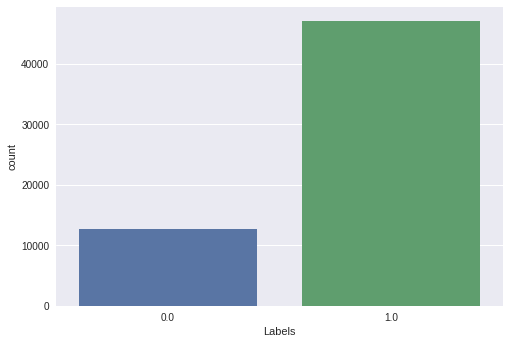

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(Data['Labels'])
plt.show()

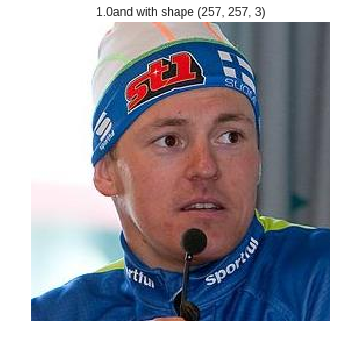

In [0]:
import cv2

img = cv2.imread("/content/Data/wiki_crop/" + Data['Paths'][0], -1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title(str(Data['Labels'][0]) + "and with shape " + str(img.shape))
plt.axis('off')
plt.show()

In [0]:
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Input, Average, GlobalMaxPooling2D, Concatenate

In [0]:
inp = Input(shape = (300, 300, 3))

# x1 = Conv2D(32, (5,5), activation = 'relu')(inp)
# x1 = Conv2D(32, (3,3), strides = 2, activation = 'relu')(x1)
# x1 = Conv2D(64, (3,3), strides = 3, activation = 'relu')(x1)
# x1 = Conv2D(128, (2,2), strides = 2, activation = 'relu')(x1)
x1 = Conv2D(128, (2,2), strides = 5, activation = 'relu')(inp)
x1 = Conv2D(512, (2,2), strides = 2, activation = 'relu')(x1)
# 25x25x128 = 80000 
# x2 = Conv2D(64, (7,7), activation ='relu')(inp)
# x2 = MaxPooling2D((2,2))(x2)

# x2 = Conv2D(128, (1,1), activation ='relu')(x2)
# x2 = MaxPooling2D((2,2))(x2)

# x2 = Conv2D(256, (1,1), activation ='relu')(x2)
# x2 = MaxPooling2D((2,2))(x2)
# x2 = MaxPooling2D((2,2))(x2)
# x2 = MaxPooling2D((2,2))(x2)
# 37.5x37.5x256 = 360000
fc1 = GlobalMaxPooling2D()(x1)
# fc2 = Flatten()(x2)

# fc1 = Dense(1024, activation = 'tanh')(fc1)
# fc2 = Dense(1024, activation = 'tanh')(fc2)

# fc = Average()([fc1, fc2])
# fc = Dense(512, activation ='tanh')(fc2)
opt = Dense(1, activation = 'sigmoid')(fc1) # For binary crossentropy


# fc = Dense(2, acitvation = 'softmax') # For Catergorical Crossentropy

In [0]:
model = Model(inp, opt)

In [0]:
model.compile(loss = 'binary_crossentropy',
             optimizer =  'adam',
             metrics = ['accuracy'])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 300, 300, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 128)       1664      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 512)       262656    
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 264,833
Trainable params: 264,833
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Data.Paths = Data.Paths.map(lambda x: x[0])

paths_male = Data.Paths[Data.Labels == 1.0][:5000]
paths_female = Data.Paths[Data.Labels == 0.0][:5000]


labels_male = Data.Labels[Data.Labels == 1.0][:5000]
labels_female = Data.Labels[Data.Labels == 0.0][:5000]

In [0]:
print(len(paths_male))
print(len(paths_female))

print(len(labels_male))
print(len(labels_female))

5000
5000
5000
5000


In [0]:
paths = list(paths_male.values.astype(str)) + list(paths_female.values.astype(str))
labels = list(labels_male.values) + list(labels_female.values)

In [0]:
print(len(labels))
print(len(paths))

10000
10000


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
paths_train, paths_test, labels_train, labels_test = train_test_split(paths, labels, test_size = 0.2, shuffle = True)

In [0]:
print(len(paths_train))
print(len(paths_test))

print(len(labels_train))
print(len(labels_test))

8000
2000
8000
2000


In [0]:
df_train = pd.DataFrame({'Paths': paths_train, 'Labels': pd.Series(labels_train).map(lambda x: 'male' if x == 1.0 else 'female')})
df_test = pd.DataFrame({'Paths': paths_test, 'Labels': pd.Series(labels_test).map(lambda x: 'male' if x == 1.0 else 'female')})

In [0]:
df_train.head()

,Labels,Paths
0,female,03/35108403_1996-01-02_2010.jpg
1,female,83/39294383_1981-06-14_2012.jpg
2,male,45/201245_1962-03-23_2011.jpg
3,female,25/24331825_1934-05-29_2009.jpg
4,female,06/3521306_1990-09-25_2014.jpg


In [0]:
df_test.head()

,Labels,Paths
0,male,77/18062477_1960-08-06_2012.jpg
1,female,52/25335552_1954-12-17_2010.jpg
2,female,47/47047147_1940-01-16_1964.jpg
3,male,85/2012885_1959-07-10_1991.jpg
4,female,15/11068815_1946-04-10_1967.jpg


In [0]:
import cv2
import numpy as np
def load_data(paths):
  Images = list()
  
  for path in paths:
    try:
      full_path = '/content/Data/wiki_crop/' + path
      img = cv2.imread(full_path, 1)
      img = cv2.resize(img, (300,300))
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      img = img/255
    except:
      img = np.zeros((300,300,3))
    Images.append(img)
  return np.asarray(Images, dtype = 'uint8')

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
gen = ImageDataGenerator(rescale = 1./255)

In [0]:
train_gen = gen.flow_from_dataframe(df_train, directory = '/content/Data/wiki_crop/', x_col = 'Paths',
                                   y_col = 'Labels', target_size = (300,300), class_mode = 'binary', batch_size = 32)
test_gen = gen.flow_from_dataframe(df_test, directory = '/content/Data/wiki_crop/', x_col = 'Paths',
                                   y_col = 'Labels', target_size = (300,300), class_mode = 'binary', batch_size = 32)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [0]:
def generator(paths, labels, batch_size):
    while 1:
      for i in range(0, len(paths), batch_size):
        X, y = load_data(paths[i:i + batch_size]), labels[i:i + batch_size]
        yield X,np.array(y)


In [0]:
train_generator = generator(paths_train, labels_train, 32)
val_generator = generator(paths_test, labels_test, 32)
Xt, yt = next(train_generator)

print(Xt.shape)
print(yt.shape)

(32, 300, 300, 3)
(32,)


In [0]:
X_train = load_data(paths_train[:10])

In [0]:
# train_gen = generator(paths_train, labelr_train)

In [0]:
X_test = load_data(paths_test[:10])
X_test.shape

(10, 300, 300, 3)

In [0]:
from tensorboardcolab import *

In [0]:
# !rm -r Graph
tbc = TensorBoardColab(graph_path = './Graph2')

Wait for 8 seconds...
TensorBoard link:
http://cfa8eb8c.ngrok.io


In [0]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = "val_loss", patience = 10)

In [0]:
model.fit_generator(train_generator, steps_per_epoch = 100, epochs = 1000,
                   callbacks = [es, TensorBoardColabCallback(tbc)],
                   validation_data = val_generator, validation_steps = 10)

Epoch 1/1000
100/100 [==============================] - 15s 145ms/step - loss: 0.6881 - acc: 0.5387 - val_loss: 0.6841 - val_acc: 0.5594
Epoch 2/1000
100/100 [==============================] - 14s 141ms/step - loss: 0.6865 - acc: 0.5569 - val_loss: 0.6777 - val_acc: 0.5469
Epoch 3/1000
100/100 [==============================] - 14s 142ms/step - loss: 0.6780 - acc: 0.5625 - val_loss: 0.6864 - val_acc: 0.5437
Epoch 4/1000
100/100 [==============================] - 14s 137ms/step - loss: 0.6810 - acc: 0.5606 - val_loss: 0.6813 - val_acc: 0.5687
Epoch 5/1000
100/100 [==============================] - 14s 137ms/step - loss: 0.6729 - acc: 0.5687 - val_loss: 0.6854 - val_acc: 0.5469
Epoch 6/1000
100/100 [==============================] - 14s 140ms/step - loss: 0.6696 - acc: 0.5769 - val_loss: 0.7136 - val_acc: 0.5156
Epoch 7/1000
100/100 [==============================] - 14s 138ms/step - loss: 0.6729 - acc: 0.5753 - val_loss: 0.6875 - val_acc: 0.5461
Epoch 8/1000
100/100 [===================

In [0]:
model.fit(X_train, labels_train[:1000], batch_size = 1, epochs = 10000,
         validation_split = 0.1, callbacks = [es, TensorBoardColabCallback(tbc)])

In [0]:
!nvidia-smi

Sat Mar  9 15:53:48 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 410.79       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    59W / 149W |  10969MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
!ls 

Data  data.tar	drive  Graph  sample_data


In [0]:
print(labels_train[:10])

[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0]


In [0]:
import numpy

a = np.random.randint(10, size = 15)
print(a.shape)
print(a)

(15,)
[4 9 8 3 7 7 5 7 7 7 8 3 3 9 5]


In [0]:
inp = Input(shape = (300,300,3))

x = Conv2D(16, (7,7), strides = 2, activation = 'relu')(inp)
x = Conv2D(32, (5,5), strides = 2, activation = 'relu')(x)

x1 = Conv2D(128, (1,1), strides = 2, activation ='relu')(x)
x1 = GlobalMaxPooling2D()(x1)

x2 = Conv2D(512, (1,1), strides = 2, activation ='relu')(x)
x2 = GlobalMaxPooling2D()(x2)

x = Concatenate(axis = 1)([x1, x2])
x = Dense(256, activation = 'tanh')(x)
out = Dense(1, activation = 'sigmoid')(x)

In [0]:
model2 = Model(inp, out)

In [0]:
model2.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [0]:
model2.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 300, 300, 3)  0                                            
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 147, 147, 16) 2368        input_7[0][0]                    
__________________________________________________________________________________________________
conv2d_17 (Conv2D)              (None, 72, 72, 32)   12832       conv2d_16[0][0]                  
__________________________________________________________________________________________________
conv2d_18 (Conv2D)              (None, 36, 36, 128)  4224        conv2d_17[0][0]                  
__________________________________________________________________________________________________
conv2d_19 

In [0]:
model2.fit_generator(train_generator, steps_per_epoch = 100, epochs = 1000,
                   callbacks = [es, TensorBoardColabCallback(tbc)],
                   validation_data = val_generator, validation_steps = 10)

Epoch 1/1000
100/100 [==============================] - 15s 147ms/step - loss: 0.6970 - acc: 0.4991 - val_loss: 0.6891 - val_acc: 0.5493
Epoch 2/1000
100/100 [==============================] - 14s 140ms/step - loss: 0.6906 - acc: 0.5181 - val_loss: 0.6850 - val_acc: 0.5406
Epoch 3/1000
100/100 [==============================] - 14s 141ms/step - loss: 0.6851 - acc: 0.5156 - val_loss: 0.6757 - val_acc: 0.5719
Epoch 4/1000
100/100 [==============================] - 14s 142ms/step - loss: 0.6862 - acc: 0.5291 - val_loss: 0.6876 - val_acc: 0.4500
Epoch 5/1000
100/100 [==============================] - 14s 140ms/step - loss: 0.6805 - acc: 0.5441 - val_loss: 0.6846 - val_acc: 0.5437
Epoch 6/1000
100/100 [==============================] - 14s 141ms/step - loss: 0.6815 - acc: 0.5563 - val_loss: 0.6851 - val_acc: 0.5406
Epoch 7/1000
100/100 [==============================] - 14s 138ms/step - loss: 0.6756 - acc: 0.5569 - val_loss: 0.6900 - val_acc: 0.5461
Epoch 8/1000
100/100 [===================

In [0]:
list(range(len(a)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [0]:
import urllib
import numpy as np

In [0]:
from keras.models import load_model

In [0]:
def predict(url):
  downloaded = urllib.request.urlopen(url)
  img_array = np.asarray(bytearray(downloaded.read()), dtype = 'uint8')
  img = cv2.imdecode(img_array, 1)
  img = cv2.resize(img, (300,300))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = img/255
  img = np.expand_dims(img, axis = 0)
  prediction = model.predict(img)
  prob = prediction[0][0]
  print("male: ", prob, "female: ", 1-prob)
  

In [0]:
predict('https://static01.nyt.com/images/2018/09/28/nyregion/28gender/00gender-facebookJumbo.jpg')

male:  0.48343542 female:  0.5165645778179169
